In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd drive/My Drive/Colab Notebooks

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


In [56]:
!ls

 BalckCoffer.ipynb
 bestCNNcomp2.ipynb
 ChitFund.ipynb
 CNN_RNN.ipynb
 Comp2Thaper.ipynb
'Copy of AITS Technical Assessment - round 2.ipynb'
'Copy of Copy of Emotion_Detection_using_csv_data_file (1).ipynb'
'Copy of Emotion_Detection_using_csv_data_file (1).ipynb'
'Copy of Gboost.ipynb'
'Copy of Numerai25.ipynb'
'Copy of save_and_restore_models.ipynb'
 dataset
 DEEPbidirection.ipynb
'Exercise Data.xlsx'
 Gboost.ipynb
 GradientBoostingRegressor.ipynb
 imageclass.ipynb
 Model234.ipynb
 Numerai25.ipynb
 pulkit.ipynb
'Untitled0 (1).ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb


Importing Data and Pandas library

In [57]:
import pandas as pd
data = pd.read_excel("Exercise Data.xlsx")
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400


In [58]:
data.shape

(25, 6)

As every member of the chit fund can borrow money only once, each record belongs to a unique participant.
Calculating Actual Contribution contributed by each member of the chit fund for every month.

In [59]:
data["Actual Contribution"] = data["Contribution"] - data["Amount returned to everyone in the group"]
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Actual Contribution
0,1,2000,40000,2500,37500,400,1600
1,2,2000,42000,2500,39500,320,1680
2,3,2000,45000,2500,42500,200,1800
3,4,2000,48000,2500,45500,80,1920
4,5,2000,40000,2500,37500,400,1600


Calculating Total Contribution contributed by each member of the chit fund throughout 25 months.

Total amount contributed by each member = Sum of (Contribution of every month(2000) - Amount returned) for 25 months

In [60]:
total = data["Actual Contribution"].sum()
total

43800

Calculating Return/Net Profit obtained by the Bid Winners for every month

Return = Net amount received by a participant - total amount contributed by a participant

In [61]:
data["return"] = data["Net amount recd by Bid winner"] - total
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Actual Contribution,return
0,1,2000,40000,2500,37500,400,1600,-6300
1,2,2000,42000,2500,39500,320,1680,-4300
2,3,2000,45000,2500,42500,200,1800,-1300
3,4,2000,48000,2500,45500,80,1920,1700
4,5,2000,40000,2500,37500,400,1600,-6300


Calculating Return Percentage obtained by the Bid Winners for every month

Return percentage = (Return / Total amount invested) X 100

In [62]:
data["ret%"] = (data["return"]/total)*100
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Actual Contribution,return,ret%
0,1,2000,40000,2500,37500,400,1600,-6300,-14.383562
1,2,2000,42000,2500,39500,320,1680,-4300,-9.817352
2,3,2000,45000,2500,42500,200,1800,-1300,-2.968037
3,4,2000,48000,2500,45500,80,1920,1700,3.881279
4,5,2000,40000,2500,37500,400,1600,-6300,-14.383562


Answers

Q1. What is the Annualized  Return of the person who bids in the last month ? 

Formula for Annualized Return which I was able to procure after reading on internet:
((1 + return%)^(12/months the chit fund is hold) - 1) * 100

Source: https://www.investopedia.com/terms/a/annualized-total-return.asp

In [63]:
data.iloc[24]

Month                                          25.000000
Contribution                                 2000.000000
Amount won by the bidder                    50000.000000
Chit fund organizer commission               2500.000000
Net amount recd by Bid winner               47500.000000
Amount returned to everyone in the group        0.000000
Actual Contribution                          2000.000000
return                                       3700.000000
ret%                                            8.447489
Name: 24, dtype: float64

In [64]:
((((1 + (data["ret%"][24])/100)) ** (12/25)) - 1) * 100

3.969357358648673

Annualized return of the person who bids in last month is: 3.97%



Q2. What is the Annualized Return of the person who bids in the first month ?

In [65]:
data.iloc[0]

Month                                           1.000000
Contribution                                 2000.000000
Amount won by the bidder                    40000.000000
Chit fund organizer commission               2500.000000
Net amount recd by Bid winner               37500.000000
Amount returned to everyone in the group      400.000000
Actual Contribution                          1600.000000
return                                      -6300.000000
ret%                                          -14.383562
Name: 0, dtype: float64

In [66]:
((((1 + (data["ret%"][0])/100)) ** (12/25)) - 1) * 100

-7.183019602665885

Annualized return of the person who bids in first month is: -7.18%


Q3. Write an Python script which calculates the annualized return of chit fund participant? - Show the Return % for each month's bid winner.

Return percentages of each month's bid winners.

In [67]:
data["ret%"]

0    -14.383562
1     -9.817352
2     -2.968037
3      3.881279
4    -14.383562
5     -9.817352
6     -7.534247
7     -5.251142
8    -14.383562
9     -9.817352
10    -2.968037
11     3.881279
12   -14.383562
13    -9.817352
14    -7.534247
15    -7.534247
16   -12.100457
17    -9.817352
18    -2.968037
19    -2.968037
20    -5.251142
21    -0.684932
22     1.598174
23     3.881279
24     8.447489
Name: ret%, dtype: float64

In [0]:
import seaborn as sns

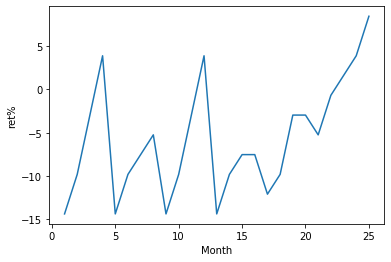

In [69]:
sns.lineplot(data["Month"], data["ret%"])

Corresponding to the essence of chit fund, the return increases as the time duration of borrowing money increases

In [0]:
import matplotlib.pyplot as plt

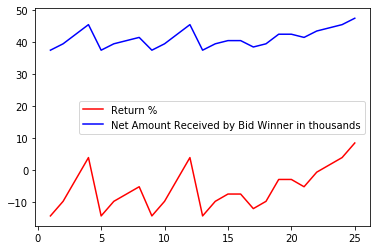

In [71]:
plt.plot(data["Month"], data["ret%"], color = 'red')
plt.plot(data["Month"], data["Net amount recd by Bid winner"]/1000, color = 'blue')
plt.legend(("Return %", "Net Amount Received by Bid Winner in thousands"))

Return is correlated with net amount received- substantiates the calculations performed above.